## import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [2]:
df = pd.read_csv("insurance.csv")

In [3]:
df.head(5)

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [6]:
region_dummies = pd.get_dummies(df['region'], drop_first=True)
region_dummies.head()

northwest  southeast  southwest
0          0          0          1
1          0          1          0
2          0          1          0
3          1          0          0
4          1          0          0

In [7]:
df = pd.concat([df, region_dummies], axis=1)

In [8]:
df.head(5)

age     sex     bmi  children smoker     region      charges  northwest  \
0   19  female  27.900         0    yes  southwest  16884.92400          0   
1   18    male  33.770         1     no  southeast   1725.55230          0   
2   28    male  33.000         3     no  southeast   4449.46200          0   
3   33    male  22.705         0     no  northwest  21984.47061          1   
4   32    male  28.880         0     no  northwest   3866.85520          1   

   southeast  southwest  
0          0          1  
1          1          0  
2          1          0  
3          0          0  
4          0          0

In [9]:
df.drop(['region'], axis=1, inplace=True)
df.head(5)

age     sex     bmi  children smoker      charges  northwest  southeast  \
0   19  female  27.900         0    yes  16884.92400          0          0   
1   18    male  33.770         1     no   1725.55230          0          1   
2   28    male  33.000         3     no   4449.46200          0          1   
3   33    male  22.705         0     no  21984.47061          1          0   
4   32    male  28.880         0     no   3866.85520          1          0   

   southwest  
0          1  
1          0  
2          0  
3          0  
4          0

In [10]:
df_age = df.groupby(by='age').mean()
df_age.head(5)

/var/folders/r8/__hqjl2n5j5_wf6w5j15gn300000gn/T/ipykernel_17338/4198459945.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_age = df.groupby(by='age').mean()


bmi  children       charges  northwest  southeast  southwest
age                                                                    
18   31.326159  0.449275   7086.217556   0.000000   0.536232   0.000000
19   28.596912  0.426471   9747.909335   0.500000   0.044118   0.455882
20   30.632759  0.862069  10159.697736   0.241379   0.275862   0.275862
21   28.185714  0.785714   4730.464330   0.250000   0.250000   0.250000
22   31.087679  0.714286  10012.932802   0.250000   0.285714   0.214286

## Data Visualization

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'children'}>,
        <Axes: title={'center': 'charges'}>]], dtype=object)

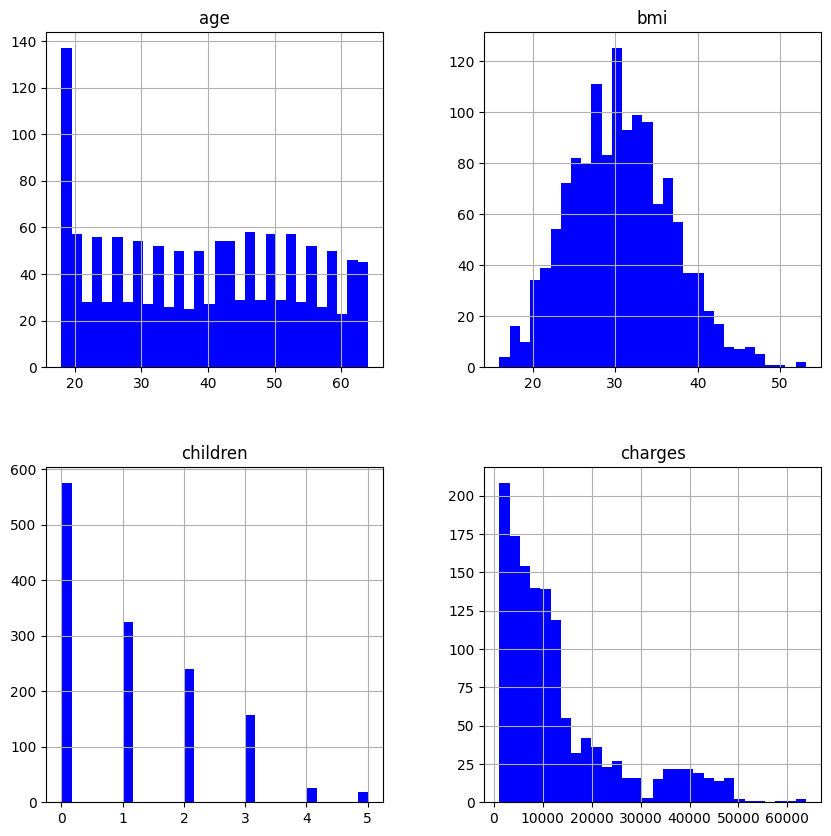

In [13]:
df[['age', 'sex', 'bmi', 'children', 'smoker', 'charges']].hist(bins=30, figsize=(10,10), color='blue')

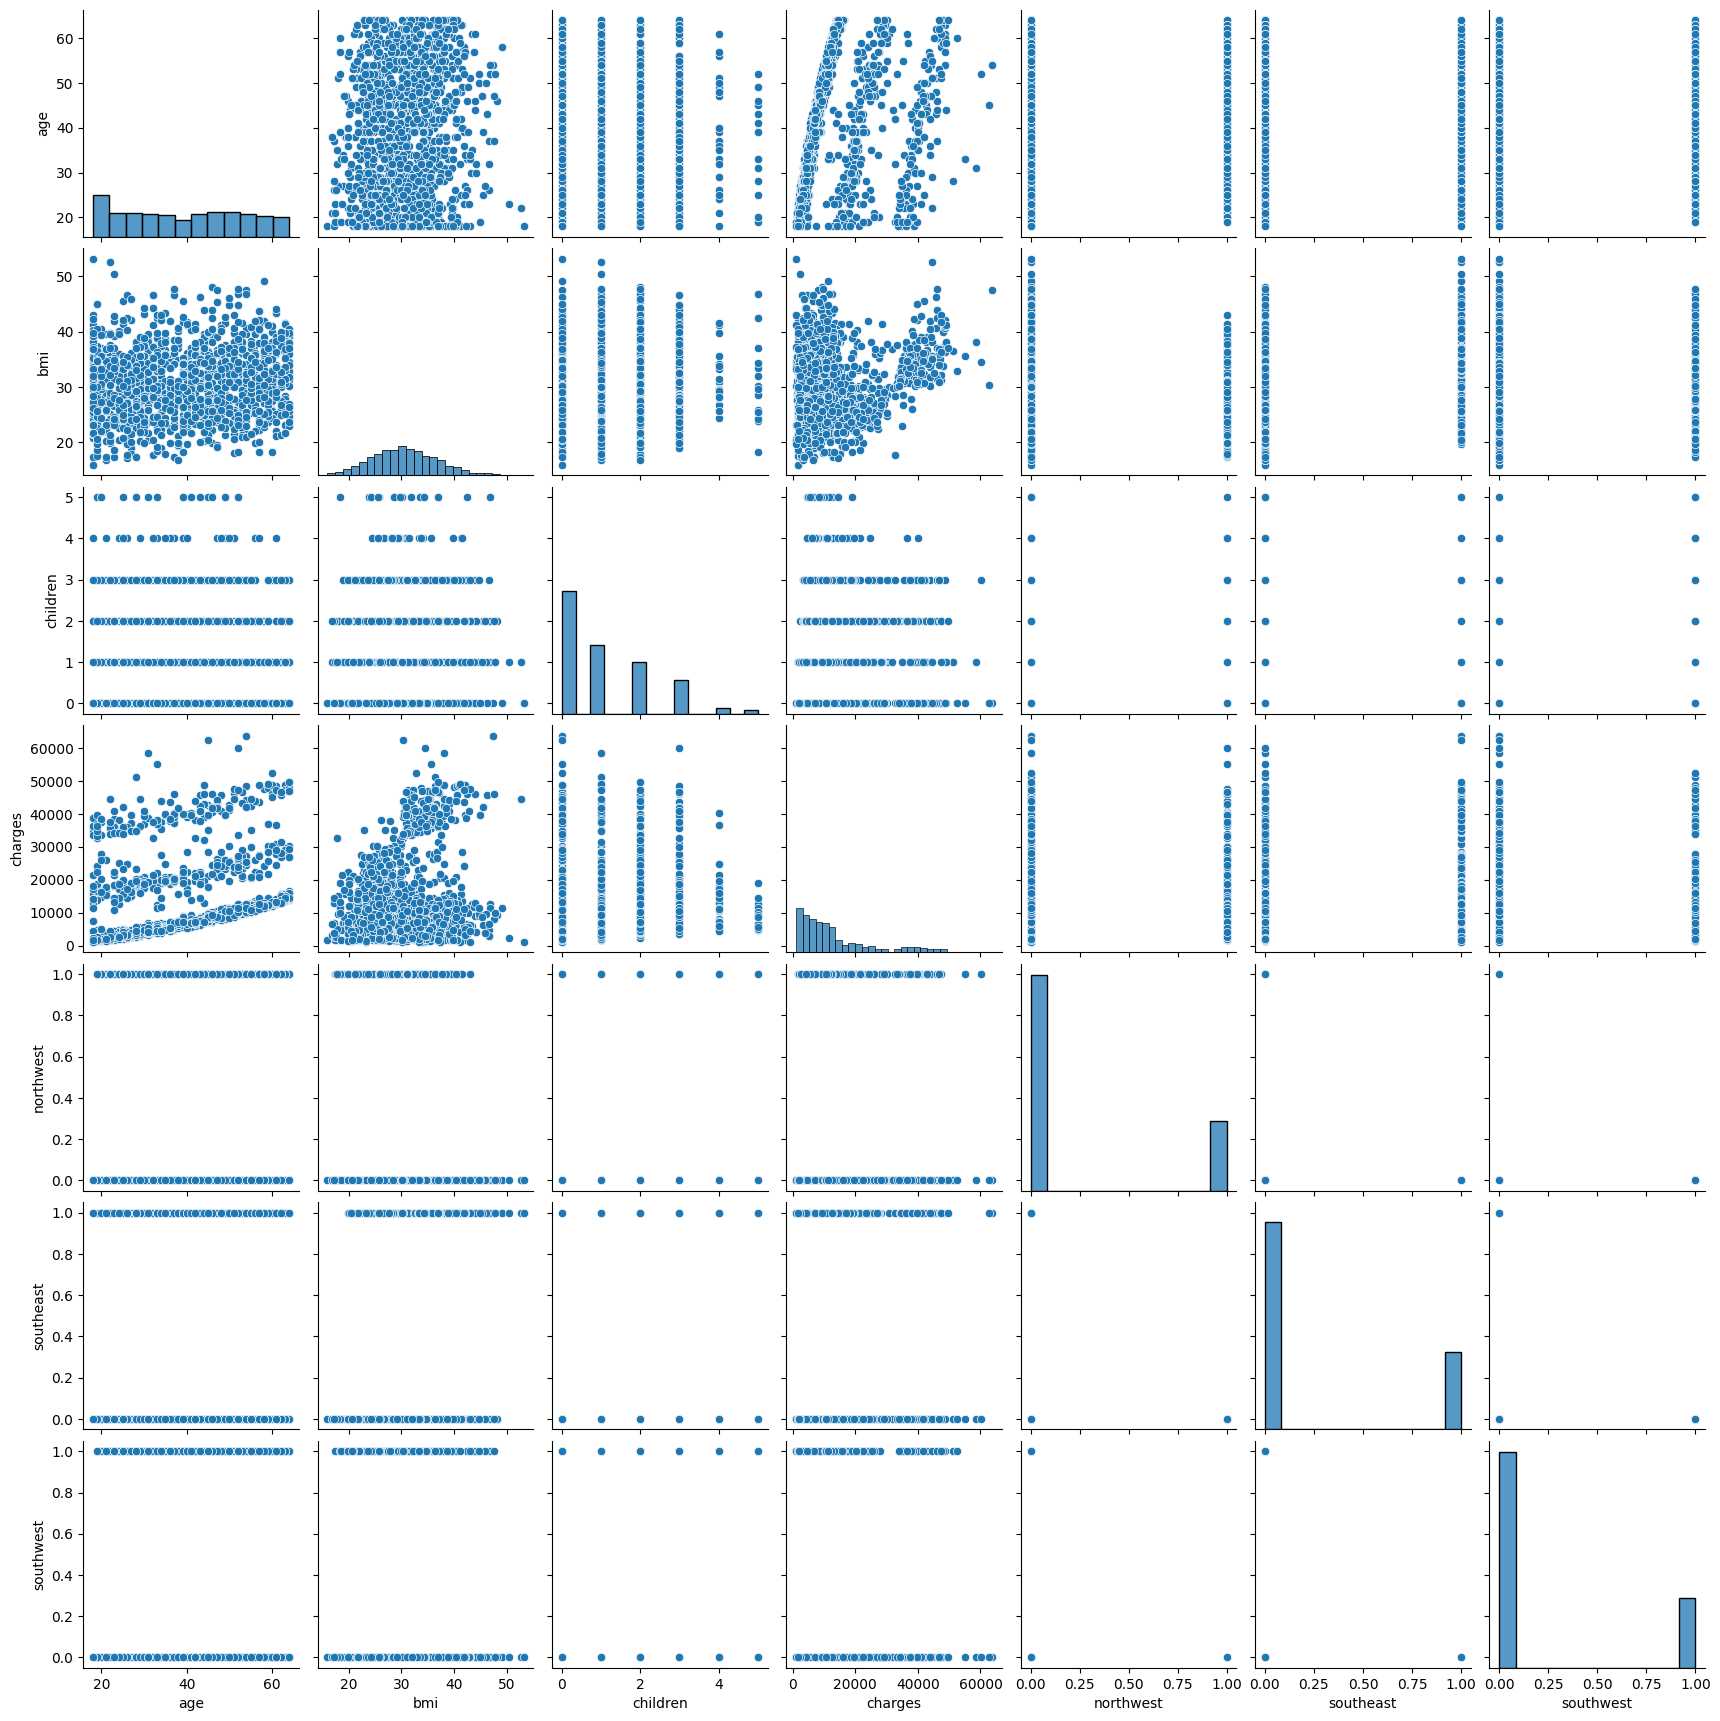

In [14]:
sns.pairplot(df)

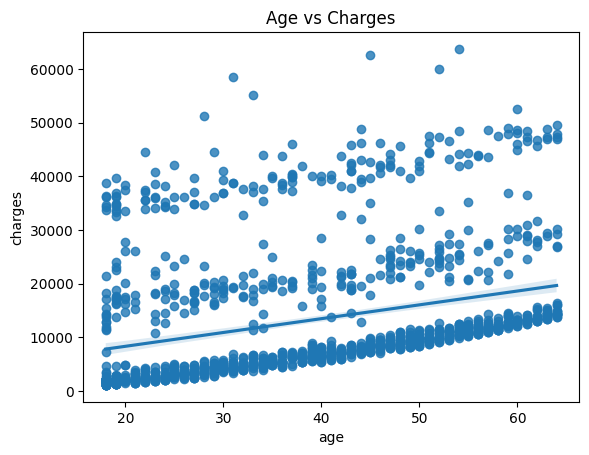

In [15]:
sns.regplot(x='age', y='charges', data=df)
plt.title('Age vs Charges')
plt.show()

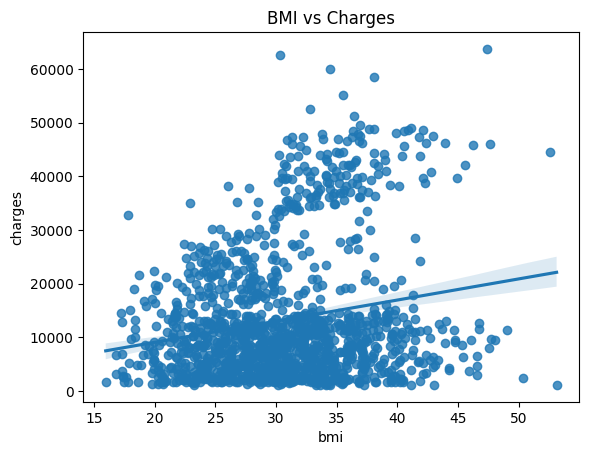

In [16]:
sns.regplot(x='bmi', y='charges', data=df)
plt.title('BMI vs Charges')
plt.show()

In [17]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(df.sex.drop_duplicates())
df.sex = le.transform(df.sex)

# smoker or not
le.fit(df.smoker.drop_duplicates())
df.smoker = le.transform(df.smoker)

In [18]:
df.head(5)

age  sex     bmi  children  smoker      charges  northwest  southeast  \
0   19    0  27.900         0       1  16884.92400          0          0   
1   18    1  33.770         1       0   1725.55230          0          1   
2   28    1  33.000         3       0   4449.46200          0          1   
3   33    1  22.705         0       0  21984.47061          1          0   
4   32    1  28.880         0       0   3866.85520          1          0   

   southwest  
0          1  
1          0  
2          0  
3          0  
4          0

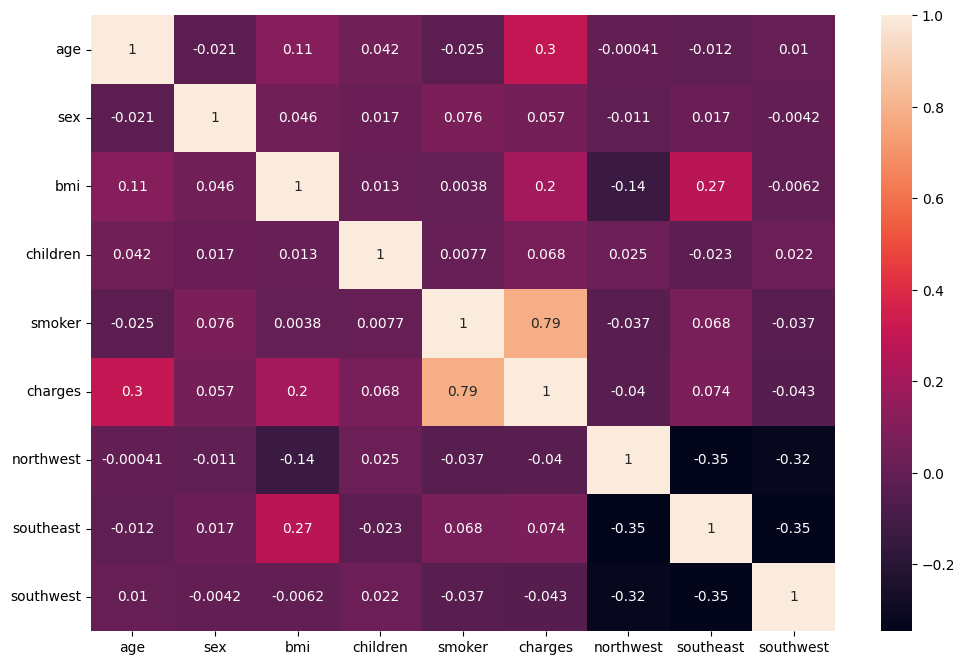

In [19]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True)
plt.show()

Text(0.5, 1.0, 'Distribution of charges for non-smokers')

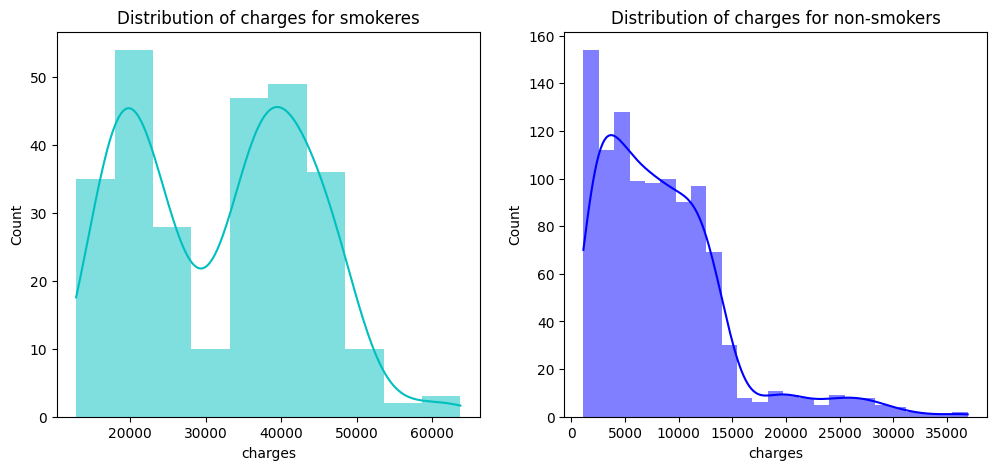

In [22]:
f = plt.figure(figsize=(12,5))
ax = f.add_subplot(121)
sns.histplot(df[(df.smoker==1)]['charges'], color='c', ax=ax, kde=True, linewidth=0)
ax.set_title('Distribution of charges for smokeres')

ax = f.add_subplot(122)
sns.histplot(df[(df.smoker==0)]['charges'], color='b', ax=ax, kde=True, linewidth=0)
ax.set_title('Distribution of charges for non-smokers')

<Figure size 1200x800 with 0 Axes>

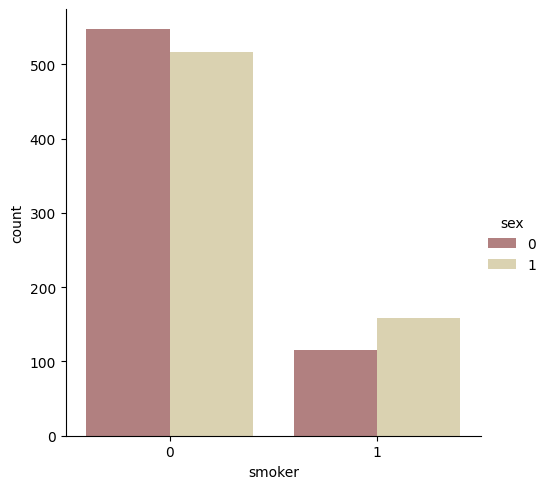

In [23]:
plt.figure(figsize=(12, 8))
sns.catplot(x='smoker', kind='count', hue='sex', palette='pink', data=df)

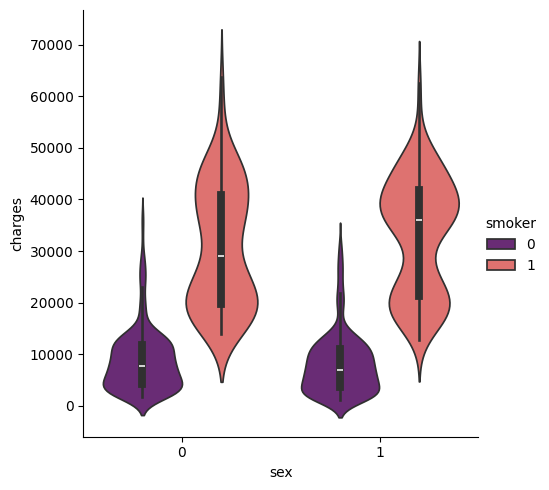

In [24]:
sns.catplot(x='sex', y='charges', hue='smoker', kind='violin', data=df, palette='magma')

/var/folders/r8/__hqjl2n5j5_wf6w5j15gn300000gn/T/ipykernel_17338/2065729439.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='smoker', x='charges', data=df[(df.sex==0)], orient='h', palette='magma')


<Axes: title={'center': 'Box plot for charges of women'}, xlabel='charges', ylabel='smoker'>

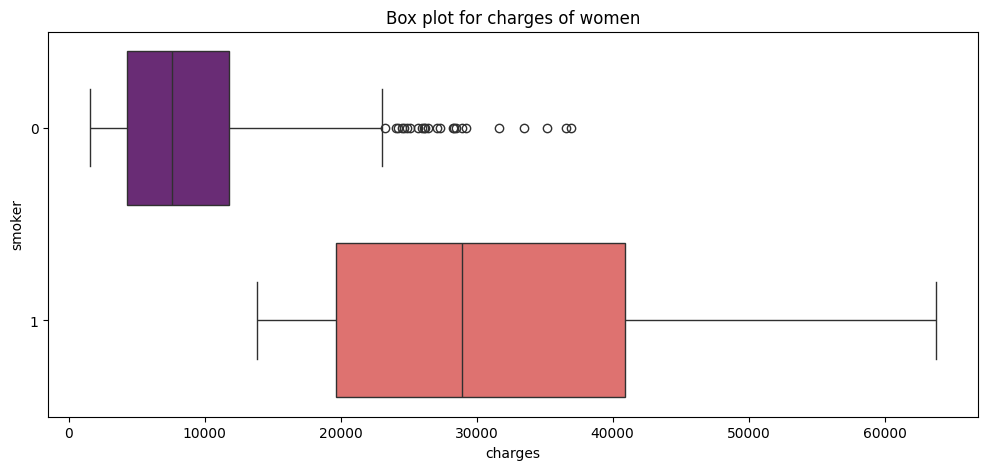

In [29]:
plt.figure(figsize=(12, 5))
plt.title('Box plot for charges of women')
sns.boxplot(y='smoker', x='charges', data=df[(df.sex==0)], orient='h', palette='magma')

/var/folders/r8/__hqjl2n5j5_wf6w5j15gn300000gn/T/ipykernel_17338/534873116.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='smoker', x='charges', data=df[(df.sex==1)], orient='h', palette='rainbow')


<Axes: title={'center': 'Box plot for charges of men'}, xlabel='charges', ylabel='smoker'>

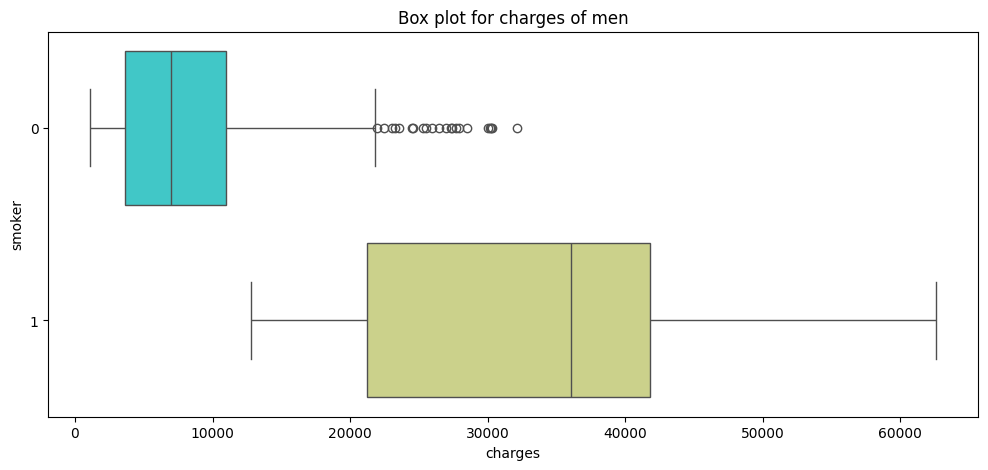

In [27]:
plt.figure(figsize=(12, 5))
plt.title('Box plot for charges of men')
sns.boxplot(y='smoker', x='charges', data=df[(df.sex==1)], orient='h', palette='rainbow')

<Axes: title={'center': 'Distribution of age'}, xlabel='age', ylabel='Count'>

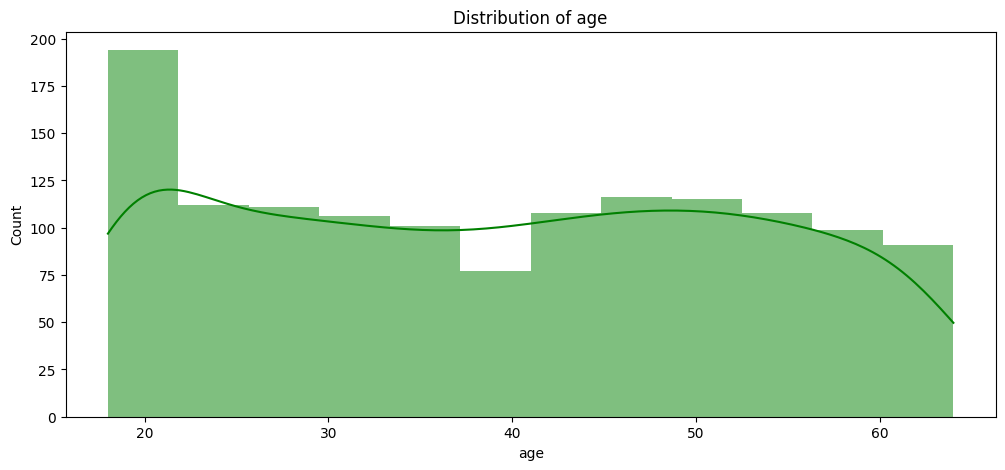

In [30]:
plt.figure(figsize=(12,5))
plt.title('Distribution of age')
sns.histplot(df['age'], color='g', kde=True, linewidth=0)

Text(0.5, 1.0, 'The number of smokers and non-smokers (18 years old)')

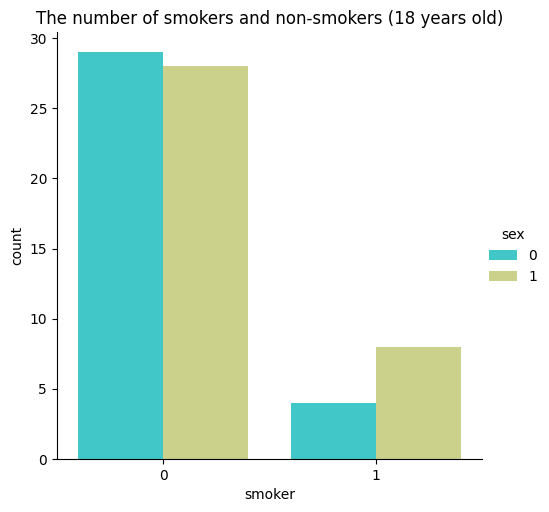

In [31]:
sns.catplot(x='smoker', kind='count', hue='sex', palette='rainbow', data=df[(df.age==18)])
plt.title('The number of smokers and non-smokers (18 years old)')

/var/folders/r8/__hqjl2n5j5_wf6w5j15gn300000gn/T/ipykernel_17338/3894343861.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='smoker', x='charges', data=df[(df.age==18)], orient='h', palette='pink')


<Axes: title={'center': 'box plot for charges 18 years old smokers'}, xlabel='charges', ylabel='smoker'>

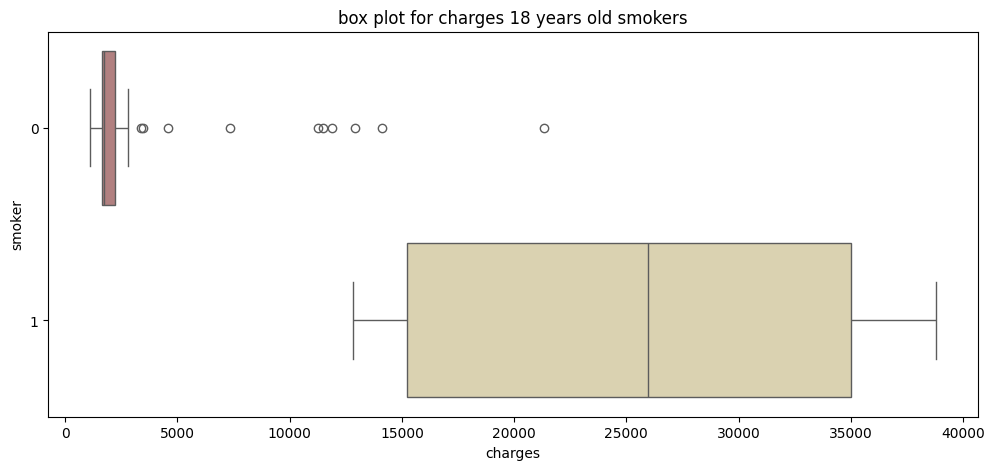

In [32]:
plt.figure(figsize=(12,5))
plt.title('box plot for charges 18 years old smokers')
sns.boxplot(y='smoker', x='charges', data=df[(df.age==18)], orient='h', palette='pink')

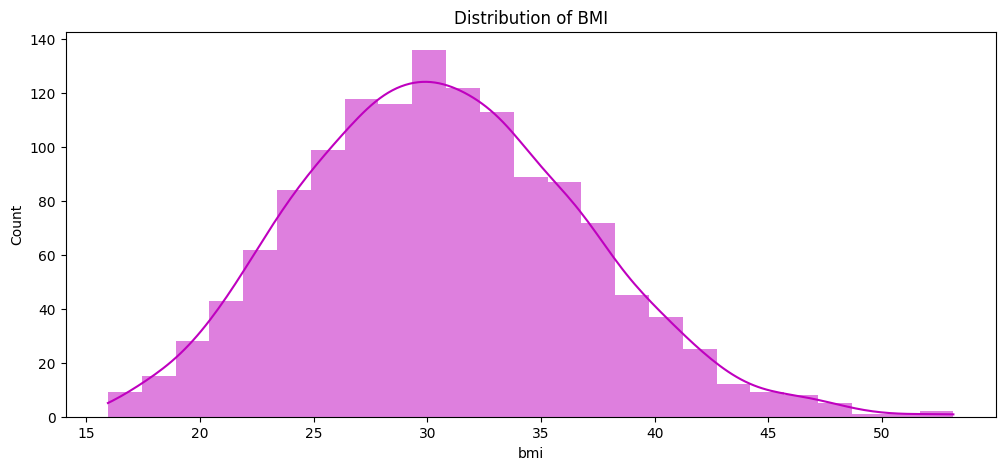

In [33]:
plt.figure(figsize=(12,5))
plt.title('Distribution of BMI')
ax = sns.histplot(df['bmi'], color='m', kde=True, linewidth=0)

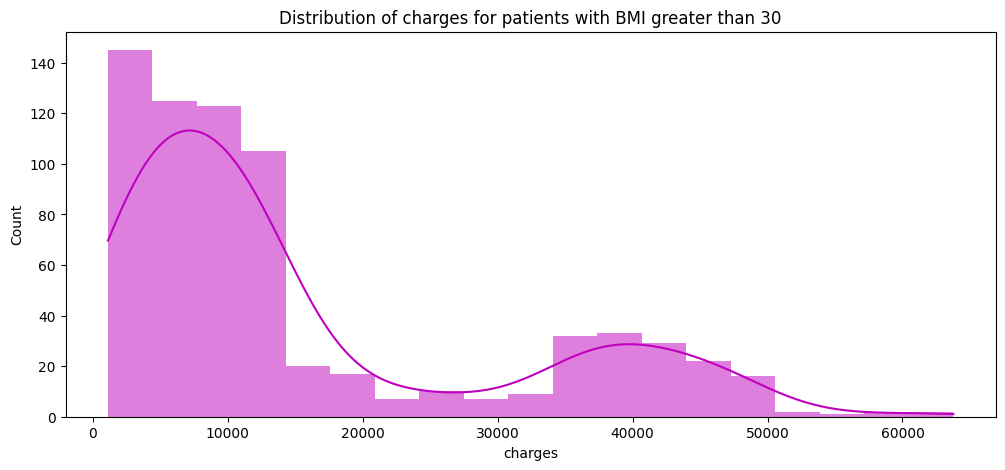

In [34]:
plt.figure(figsize=(12,5))
plt.title("Distribution of charges for patients with BMI greater than 30")
ax = sns.histplot(df[(df.bmi >= 30)]['charges'], color='m', kde=True, linewidth=0)

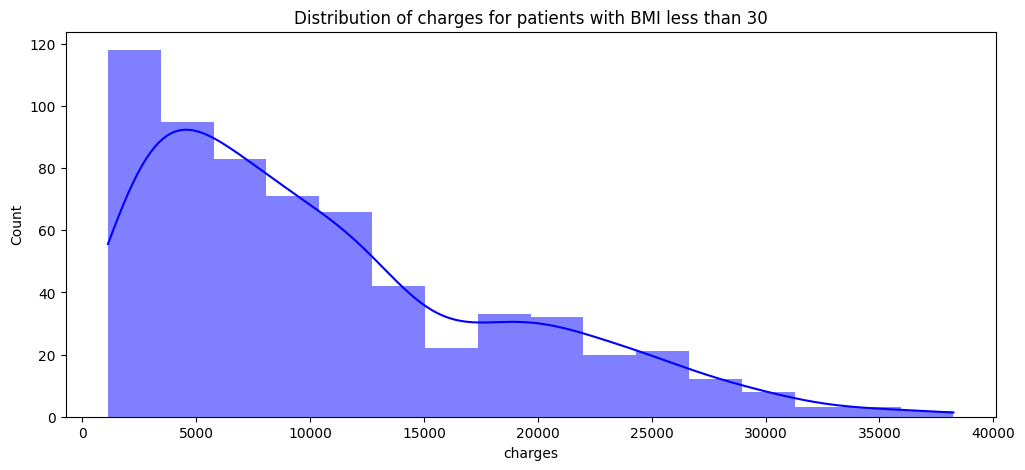

In [35]:
plt.figure(figsize=(12,5))
plt.title("Distribution of charges for patients with BMI less than 30")
ax = sns.histplot(df[(df.bmi<30)]['charges'], color='b', kde=True, linewidth=0)

/var/folders/r8/__hqjl2n5j5_wf6w5j15gn300000gn/T/ipykernel_17338/3946637691.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x='children', kind='count', palette='ch:.25', data=df, height=6)


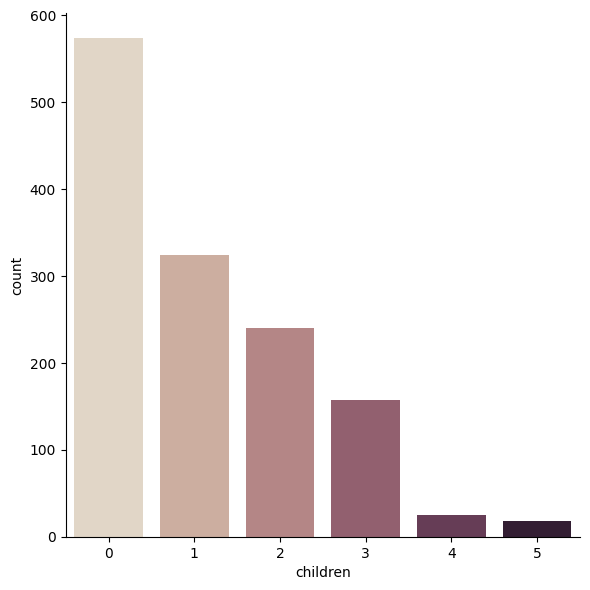

In [36]:
sns.catplot(x='children', kind='count', palette='ch:.25', data=df, height=6)

Text(0.5, 1.0, 'smokers and non-smokers who have children')

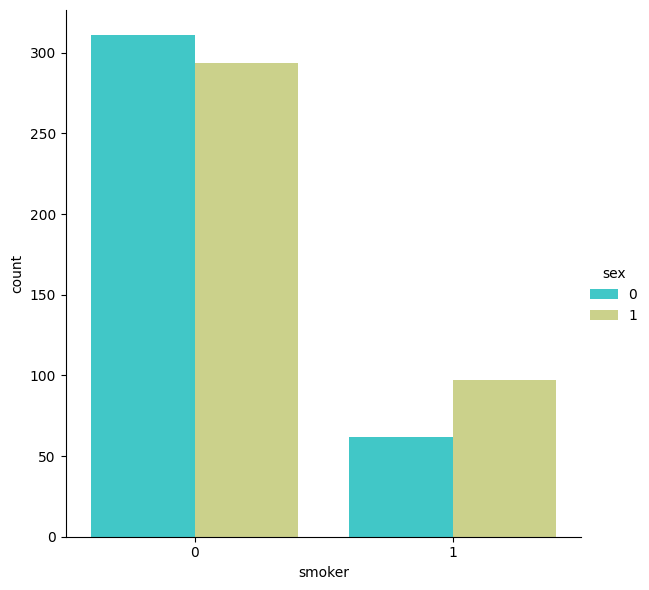

In [37]:
sns.catplot(x='smoker', kind='count', palette='rainbow', hue='sex', data=df[(df.children>0)], height=6)
ax.set_title("smokers and non-smokers who have children")

In [38]:
X = df.drop(['charges'], axis=1)
y = df.charges

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [39]:
print(X_train.shape, X_test.shape)

(1070, 8) (268, 8)


In [40]:
def model_pred(model):
    model.fit(X_train, y_train)
    print(model.score(X_test, y_test))

In [41]:
from sklearn.linear_model import LinearRegression

In [42]:
lr = LinearRegression()

In [44]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

rfr = RandomForestRegressor()

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [4, 5 , 6, 7, 8],
    'max_features': ['auto', 'sqrt', 'log2'],
    'random_state': [0, 1, 42]
}

In [45]:
cv_random = RandomizedSearchCV(rfr, param_grid, cv=5)
cv_random.fit(X_train, y_train)

/Users/quangtn/opt/anaconda3/envs/bentoML/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
15 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/quangtn/opt/anaconda3/envs/bentoML/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/quangtn/opt/anaconda3/envs/bentoML/lib/python3.8/site-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/Users/quangtn/opt/anaconda3/envs/bentoML/lib/python3.8/site-packages/sklearn/base.py", line 638,

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [4, 5, 6, 7, 8],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'n_estimators': [100, 200],
                                        'random_state': [0, 1, 42]})

In [58]:
rfReg = RandomForestRegressor(n_estimators=100, max_features='auto', max_depth=4, random_state=42)

In [49]:
from xgboost import XGBRegressor

xgbR = XGBRegressor()

xgb_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [4, 6, 8, 10],
    'min_child_weight': [2, 4, 10, 12]
}

In [50]:
cv_xgbR = GridSearchCV(xgbR, xgb_params, cv=5)
cv_xgbR.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...,
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'max_depth': [4, 6, 8, 10],
                         'min_child_weight': [2, 4, 10, 12],
                         'n_estimators': [100, 200, 300]})

In [51]:
cv_xgbR.best_params_

{'max_depth': 4, 'min_child_weight': 12, 'n_estimators': 100}

In [52]:
xgbReg = XGBRegressor(max_depth=4, min_child_weight=10, n_estimators=100)

In [56]:
print('Score of Linear Regressor: ', model_pred(lr))

0.7999876970680433
Score of Linear Regressor:  None


In [ ]:
print("Score of Random Forest Regressor")
model_pred(rfReg)

In [60]:
print("Score of XGBoost Regressor:")
model_pred(xgbReg)

Score of XGBoost Regressor:
0.8841305469447374


In [64]:
xgbReg_train_pred = xgbReg.predict(X_train)
xgbReg_test_pred = xgbReg.predict(X_test)

print("MSE train data: %.3f, MSE test data: %.3f"%(mean_squared_error(y_train, rfReg_train_pred),mean_squared_error(y_test, rfReg_test_pred)))
print("R2 train data: %.3f, R2 test data: %.3f"%(r2_score(y_train, rfReg_train_pred),r2_score(y_test, rfReg_test_pred)))

MSE train data: 10262689.021, MSE test data: 18438301.699
R2 train data: 0.928, R2 test data: 0.884


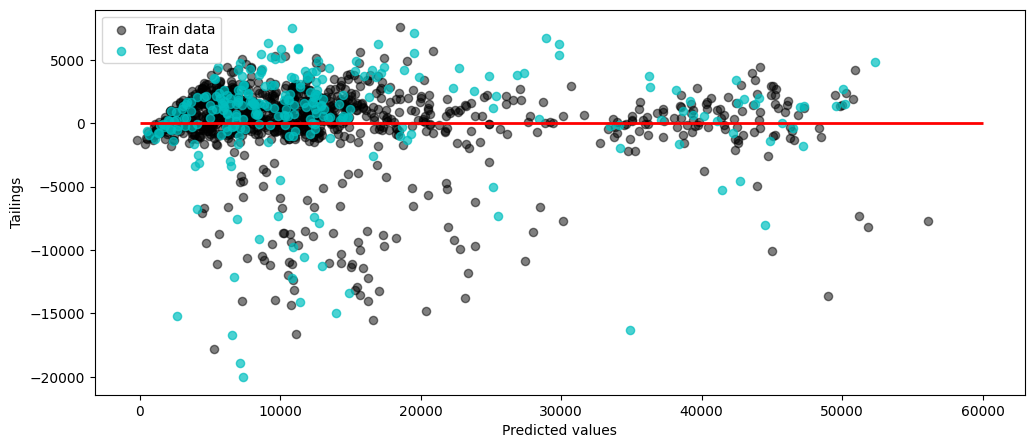

In [66]:
plt.figure(figsize=(12,5))

plt.scatter(xgbReg_train_pred, xgbReg_train_pred - y_train, c='black', marker='o', s=35,
            alpha=0.5, label='Train data')
plt.scatter(xgbReg_test_pred, xgbReg_test_pred - y_test, c='c', marker='o', s=35,
            alpha=0.7, label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Tailings')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=0, xmax=60000, lw=2, color='red')
plt.show()